# What Factors Affect Students' Math Score?
## - Exploring the PISA Data



##                        by Jie Gu

## Investigation Overview

> We would like to answer the title question from the following perspectives:
> 1. How does the choice of school play into academic performance?
> 2. Are there differences in achievement based on gender, location, or student attitudes?
> 3. How do the parents (education and employment status) affect children's academic achievement?


## PISA Data

> [PISA](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip&sa=D&ust=1552846825266000) is a survey of students' skills and knowledge as they approach the end of compulsory education. Around 510,000 students in [65 economies](https://www.google.com/url?q=http://www.oecd.org/pisa/aboutpisa/pisa-2012-participants.htm&sa=D&ust=1552846825267000) took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally.

In [5]:
%matplotlib inline
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

## Number of computers at school

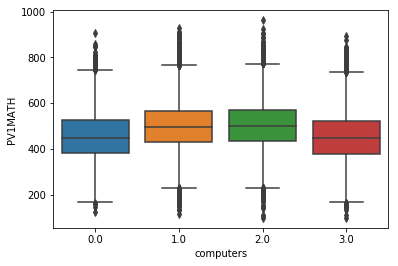

In [7]:
# load in the dataset into a pandas dataframe
df_school = pd.read_csv('school.csv')
sns.boxplot(x= 'computers', y='PV1MATH', data=df_school);

Both too few and too many computers at school have negative impact on students' math scores

## Number of computers at school (by region)

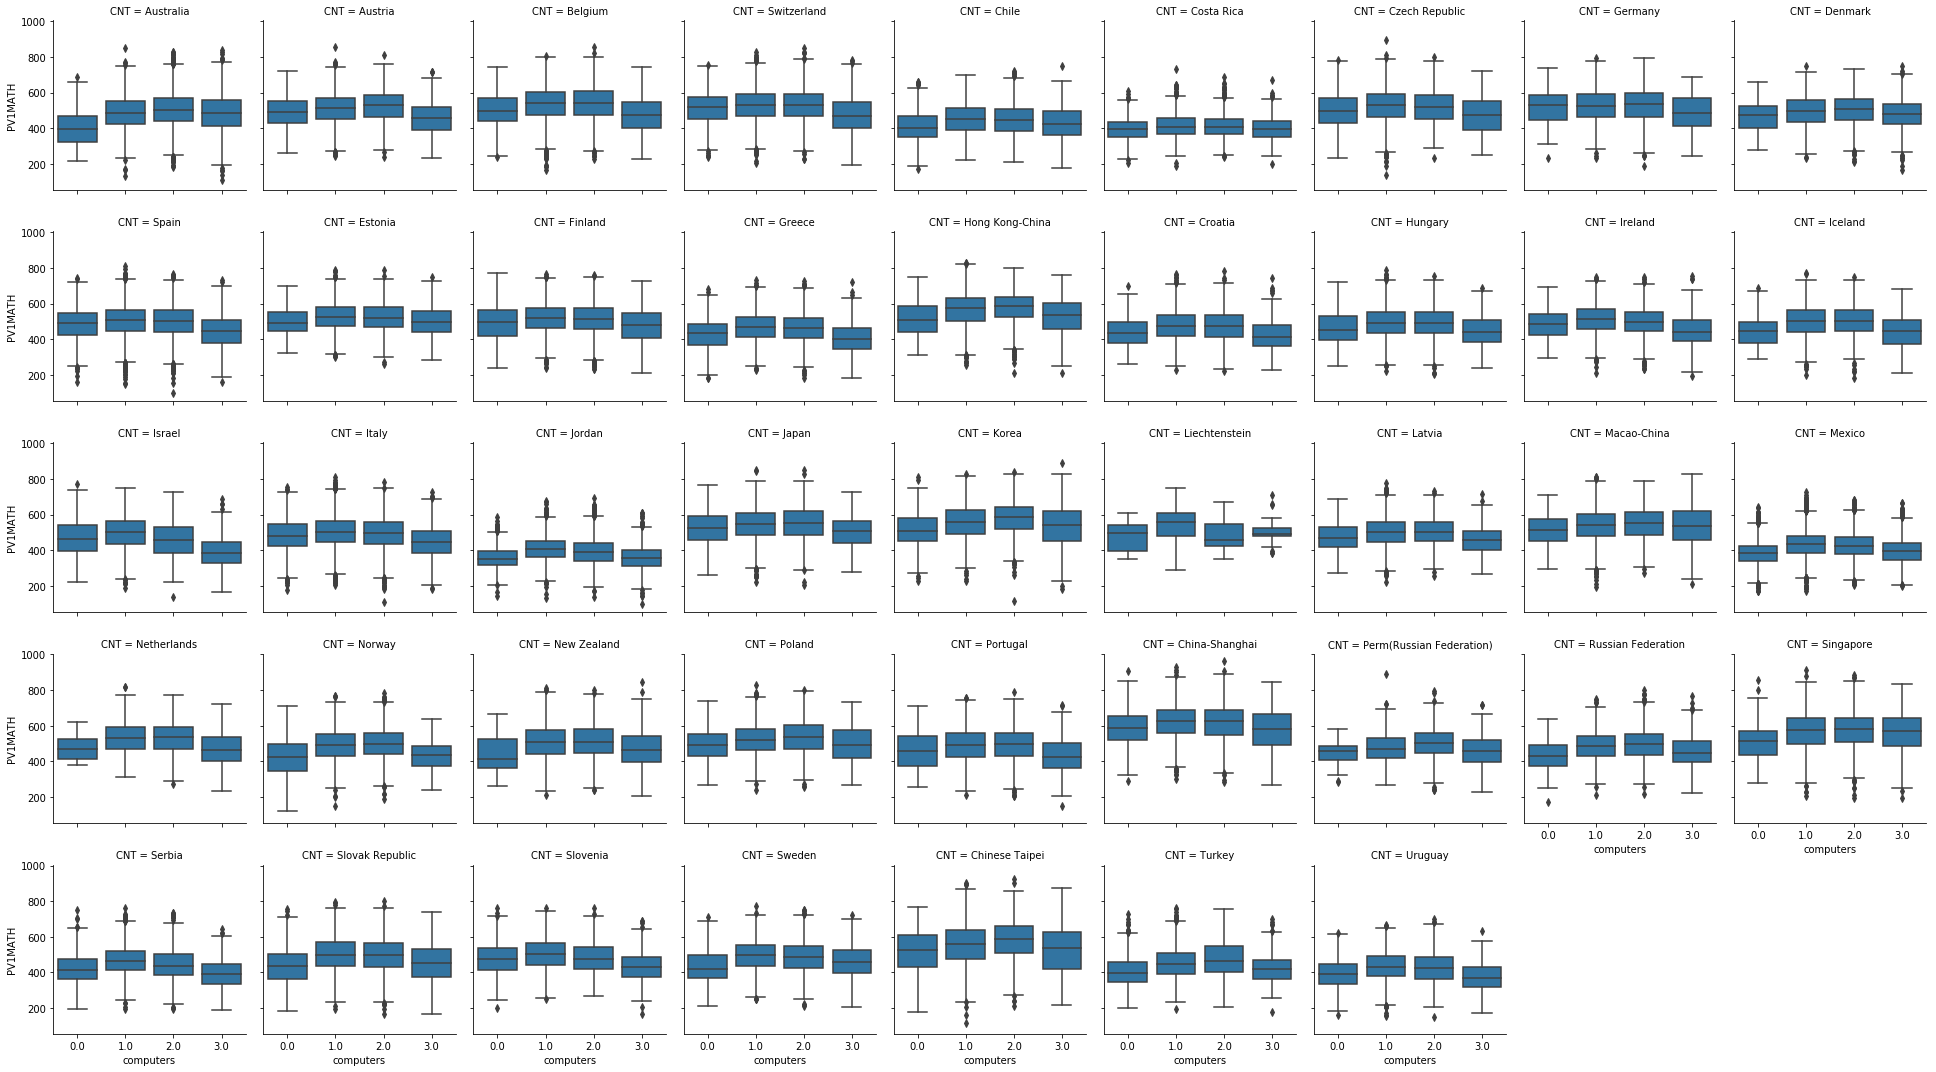

In [10]:
g = sns.FacetGrid(data = df_school, col = 'CNT', col_wrap=9)
g.map(sns.boxplot, 'computers', 'PV1MATH');

Similar trend can be observed when the data is resolved by region

## Gender

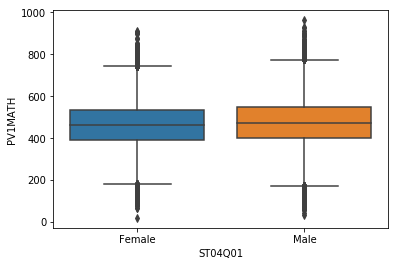

In [12]:
df_gender = pd.read_csv('gender.csv')
sns.boxplot(x= 'ST04Q01', y='PV1MATH', data=df_gender);

Gender does not make a big difference

## Location

Students with the best performance in math are from Shanghai (China), Singapore and Hong Kong (China)

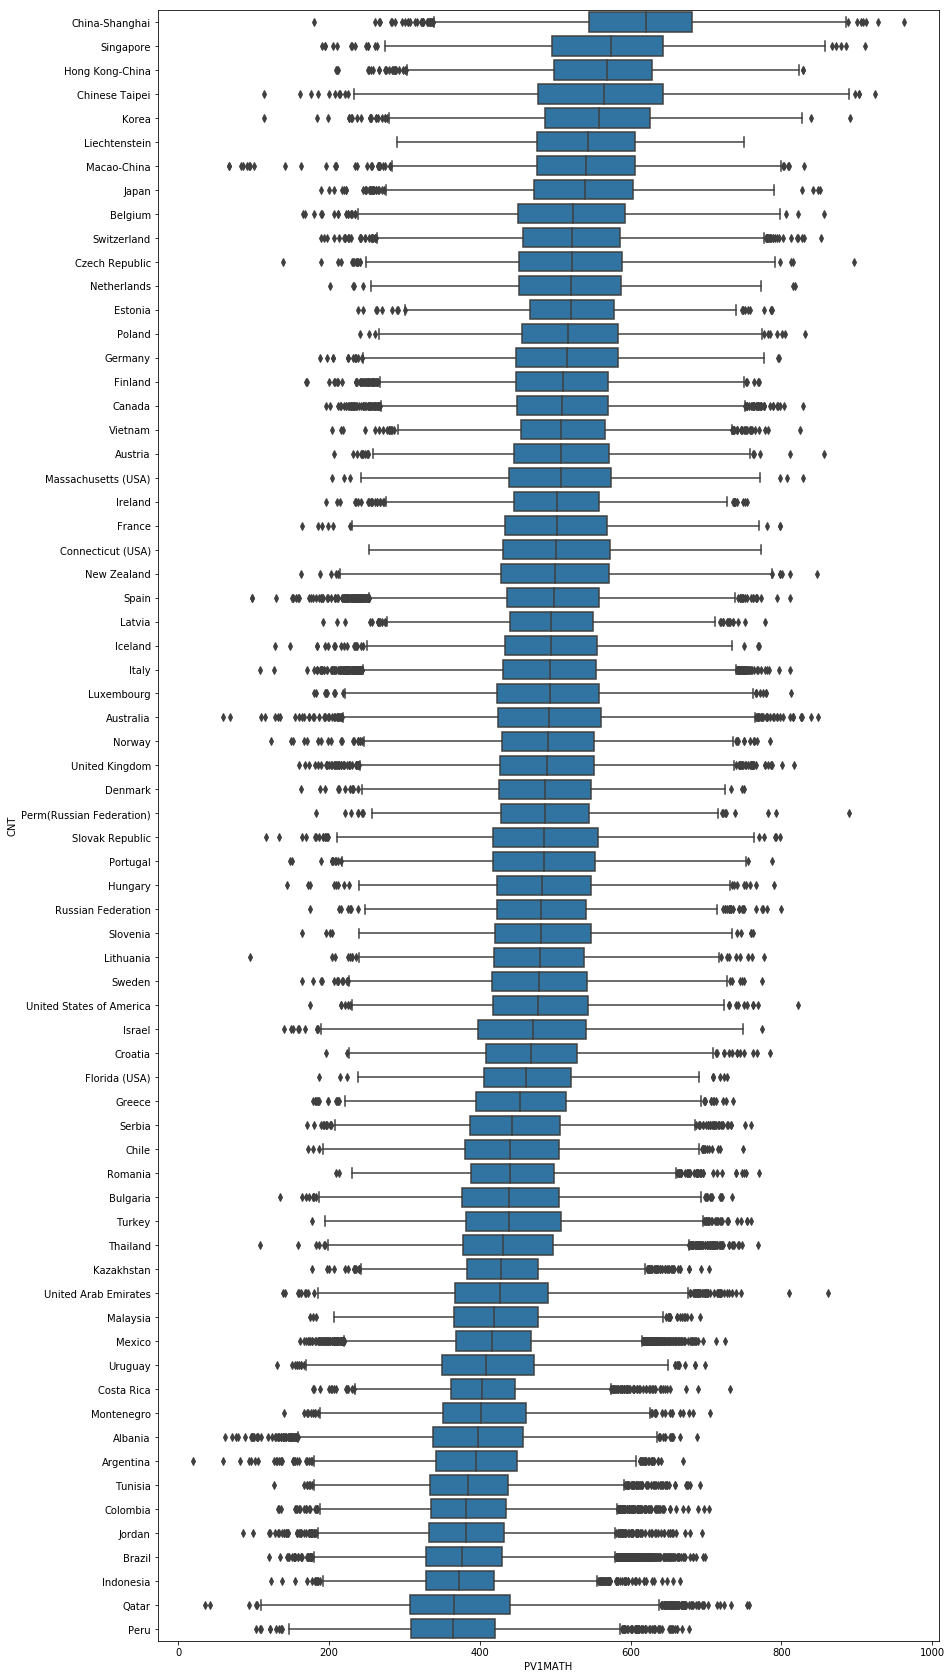

In [13]:
df_loc = pd.read_csv('loc.csv')
plt.figure(figsize=(14,30))
base_color = sns.color_palette()[0]
my_order = df_loc.groupby('CNT')["PV1MATH"].median().sort_values(ascending=False).index
sns.boxplot(y= 'CNT', x='PV1MATH', data=df_loc, orient="h", color = base_color, order=my_order);

# Attitude

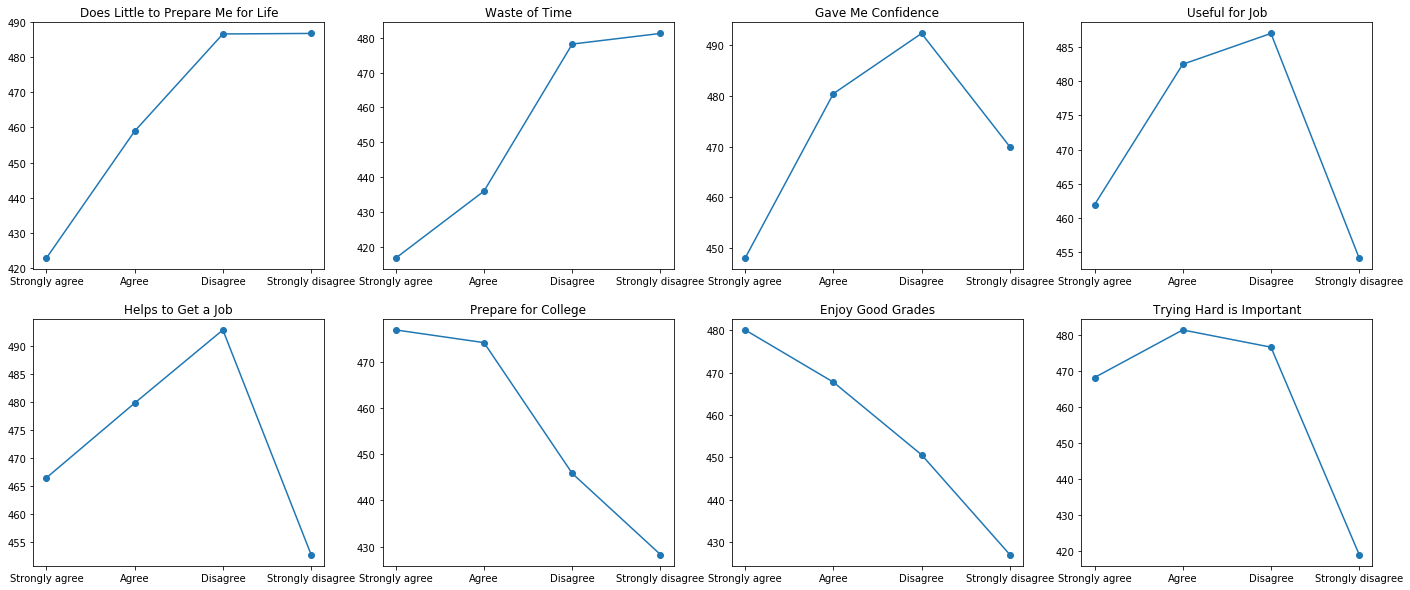

In [27]:
df_attitude = pd.read_csv('attitude.csv')
attitudes = ['ST88Q01','ST88Q02','ST88Q03','ST88Q04','ST89Q02','ST89Q03','ST89Q04','ST89Q05']
titles = ['Does Little to Prepare Me for Life', 'Waste of Time', 'Gave Me Confidence', 'Useful for Job',
          'Helps to Get a Job','Prepare for College', 'Enjoy Good Grades', 'Trying Hard is Important']
fig, axes = plt.subplots(2, 4, figsize=(24,10)) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(8):
    plt.sca(axes[i]) # set the current Axes
    att = df_attitude.groupby(attitudes[i]).mean().reindex(index=['Strongly agree', 'Agree','Disagree','Strongly disagree'] )
    plt.plot(att, marker='o')
    plt.title(titles[i])

Generally, students perform better in math if they have more positive attitude

# Parents' Qualifications

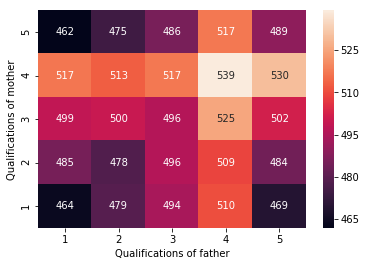

In [33]:
df_qual = pd.read_csv('qual.csv')
df_qual_mean = df_qual.groupby(['M','F'])['PV1MATH'].mean()
df_qual_mean = df_qual_mean.reset_index()
df_qual_mean = df_qual_mean.pivot(index = 'M', columns = 'F', values = 'PV1MATH')
df_qual_mean.sort_index(level=0, ascending=False,inplace=True)
sns.heatmap(data = df_qual_mean, annot=True, fmt=".0f");
plt.xlabel('Qualifications of father');
plt.ylabel('Qualifications of mother');

Generally, the child's performance in math is better when parents both have higher qualifications, but there is an anomaly when parents have the highest qualifications

# Parents' Job Status

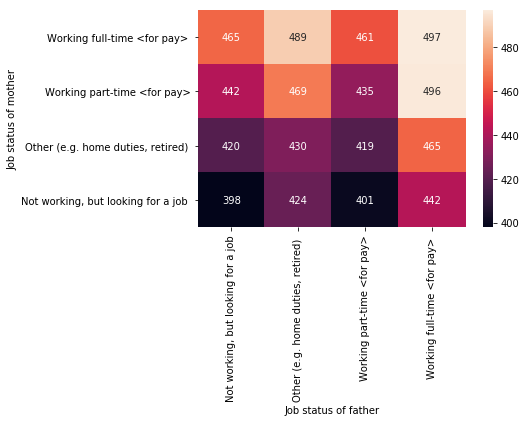

In [32]:
df_job = pd.read_csv('job.csv')
df_job_mean = df_job.groupby(['M','F'])['PV1MATH'].mean()
df_job_mean = df_job_mean.reset_index()
df_job_mean = df_job_mean.pivot(index = 'M', columns = 'F', values = 'PV1MATH')
df_job_mean = df_job_mean.reindex(index = ['Working full-time <for pay> ','Working part-time <for pay>',
                                           'Other (e.g. home duties, retired) ', 'Not working, but looking for a job '
                           ])
df_job_mean = df_job_mean[['Not working, but looking for a job','Other (e.g. home duties, retired) ',
                          'Working part-time <for pay>', 'Working full-time <for pay> ' ]]
sns.heatmap(data = df_job_mean, annot=True, fmt=".0f");
plt.xlabel('Job status of father');
plt.ylabel('Job status of mother');

The child performs the best when both father and mother have full-time job, and the worst when neither is working